In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
ads_data=pd.read_csv("ad.csv")
health_data=pd.read_csv("health.csv")

<ipython-input-54-9a6effdd7d50>:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  ads_data=pd.read_csv("ad.csv")


In [55]:
health_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [56]:
ads_data = ads_data.drop(ads_data.columns[0], axis=1)
ads_data.head()

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


# **1. Perform relevant data-preprocessing techniques**

In [57]:
ads_data.head()

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [58]:
health_data.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [59]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

encoder = LabelEncoder()
scaler = MinMaxScaler()

health_data = health_data.drop('id', axis=1)

health_data['ever_married'] = health_data['ever_married'].map({'Yes': 1, 'No': 0})

for col in ['Residence_type', 'gender']:
    health_data[col] = encoder.fit_transform(health_data[col])

work_type_encoded = pd.get_dummies(health_data['work_type'], prefix='work_type', drop_first=True,dtype=int)
health_data = pd.concat([health_data, work_type_encoded], axis=1)
health_data = health_data.drop('work_type', axis=1)

smoking_status_encoded = pd.get_dummies(health_data['smoking_status'], prefix='smoking_status', drop_first=True,dtype=int)
health_data = pd.concat([health_data, smoking_status_encoded], axis=1)
health_data = health_data.drop('smoking_status', axis=1)

health_data = health_data.drop(columns=['bmi'])

cols_to_normalize = ['avg_glucose_level', 'age']
health_data[cols_to_normalize] = scaler.fit_transform(health_data[cols_to_normalize])

health_data.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
Residence_type,0
avg_glucose_level,0
stroke,0
work_type_Never_worked,0
work_type_Private,0


In [60]:
health_data.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0.816895,0,1,1,1,0.801265,1,0,1,0,0,1,0,0
1,0,0.743652,0,0,1,0,0.679023,1,0,0,1,0,0,1,0
2,1,0.975586,0,1,1,0,0.234512,1,0,1,0,0,0,1,0
3,0,0.597168,0,0,1,1,0.536008,1,0,1,0,0,0,0,1
4,0,0.963379,1,0,1,0,0.549349,1,0,0,1,0,0,1,0


In [63]:
health_data['smoking_status_smokes'].value_counts()

,count
smoking_status_smokes,
0,4321
1,789


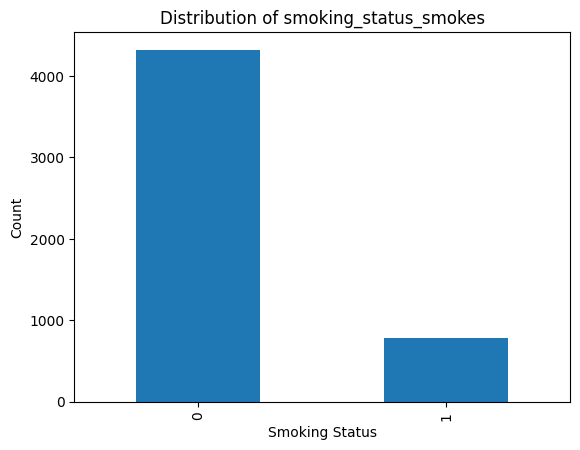

In [90]:
import matplotlib.pyplot as plt
health_data['smoking_status_smokes'].value_counts().plot(kind='bar')
plt.title('Distribution of smoking_status_smokes')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

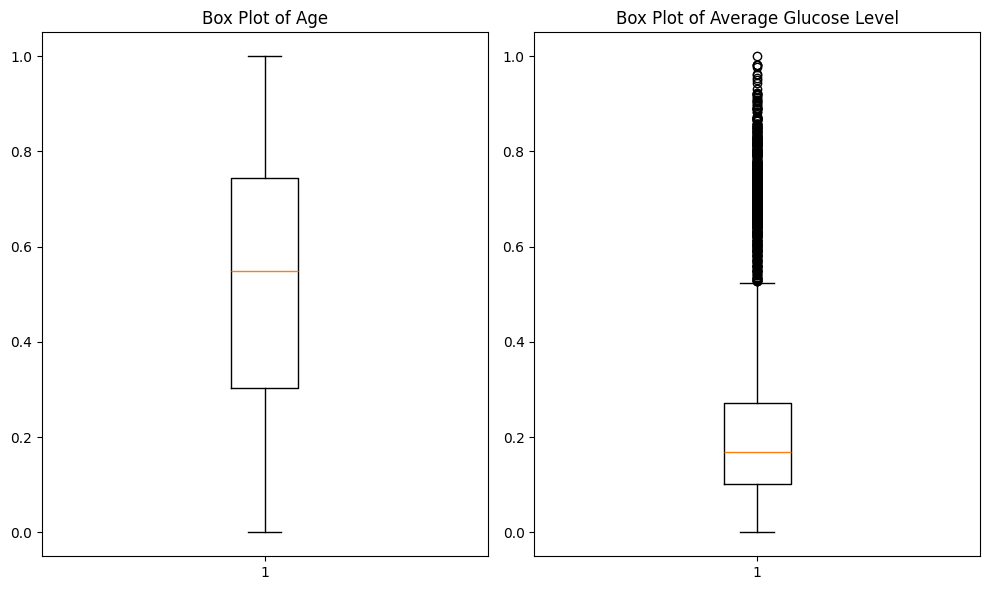

In [94]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.boxplot(health_data['age'])
plt.title('Box Plot of Age')

plt.subplot(1, 2, 2)
plt.boxplot(health_data['avg_glucose_level'])
plt.title('Box Plot of Average Glucose Level')

plt.tight_layout()
plt.show()

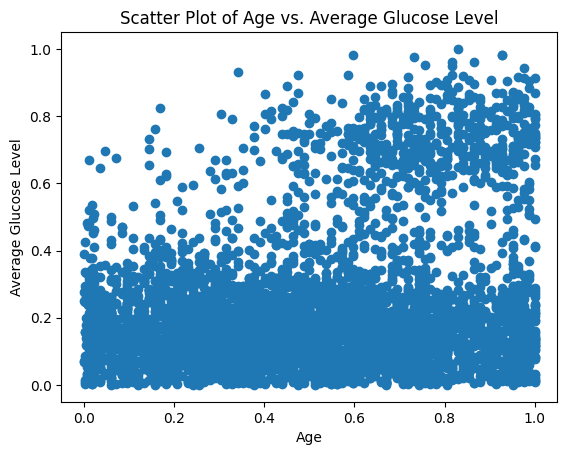

In [92]:
import matplotlib.pyplot as plt

plt.scatter(health_data['age'], health_data['avg_glucose_level'])
plt.title('Scatter Plot of Age vs. Average Glucose Level')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.show()

In [74]:
ads_data

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3274,170,94,0.5529,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3275,101,140,1.3861,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3276,23,120,5.2173,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3277,?,?,?,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.


In [96]:
health_data

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0.816895,0,1,1,1,0.801265,1,0,1,0,0,1,0,0
1,0,0.743652,0,0,1,0,0.679023,1,0,0,1,0,0,1,0
2,1,0.975586,0,1,1,0,0.234512,1,0,1,0,0,0,1,0
3,0,0.597168,0,0,1,1,0.536008,1,0,1,0,0,0,0,1
4,0,0.963379,1,0,1,0,0.549349,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,0.975586,1,0,1,1,0.132167,0,0,1,0,0,0,1,0
5106,0,0.987793,0,0,1,1,0.323516,0,0,0,1,0,0,1,0
5107,0,0.426270,0,0,1,0,0.128658,0,0,0,1,0,0,1,0
5108,1,0.621582,0,0,1,0,0.513203,0,0,1,0,0,1,0,0


# **KNN From Scratch**

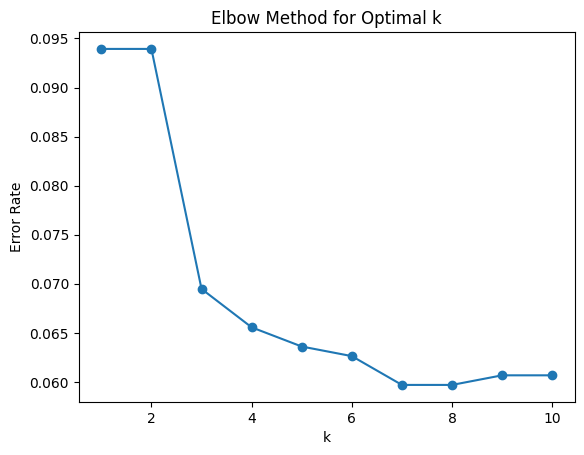

Optimal k: 7
Accuracy: 0.9403


In [103]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
def knn_scratch_elbow(df, features_cols, target_col, max_k=20):
    X = df[features_cols].values
    y = df[target_col].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    error_rates = []
    for k in range(1, max_k + 1):
        predictions = []
        for i in range(len(X_test)):
            distances = np.sqrt(np.sum((X_test[i] - X_train)**2, axis=1))
            k_nearest_indices = np.argsort(distances)[:k]
            k_nearest_labels = y_train[k_nearest_indices]
            predicted_label = Counter(k_nearest_labels).most_common(1)[0][0]
            predictions.append(predicted_label)
        error_rates.append(1 - accuracy_score(y_test, predictions))

    plt.plot(range(1, max_k + 1), error_rates, marker='o')
    plt.xlabel('k')
    plt.ylabel('Error Rate')
    plt.title('Elbow Method for Optimal k')
    plt.show()

    optimal_k = np.argmin(error_rates) + 1
    predictions = []
    for i in range(len(X_test)):
        distances = np.sqrt(np.sum((X_test[i] - X_train)**2, axis=1))
        k_nearest_indices = np.argsort(distances)[:optimal_k]
        k_nearest_labels = y_train[k_nearest_indices]
        predicted_label = Counter(k_nearest_labels).most_common(1)[0][0]
        predictions.append(predicted_label)

    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    print(f"Optimal k: {optimal_k}")
    print(f"Accuracy: {accuracy:.4f}")


features_cols = health_data.drop(columns=['stroke']).columns
target_col = 'stroke'
knn_scratch_elbow(health_data,features_cols,target_col,10)

# **Knn Builtin**

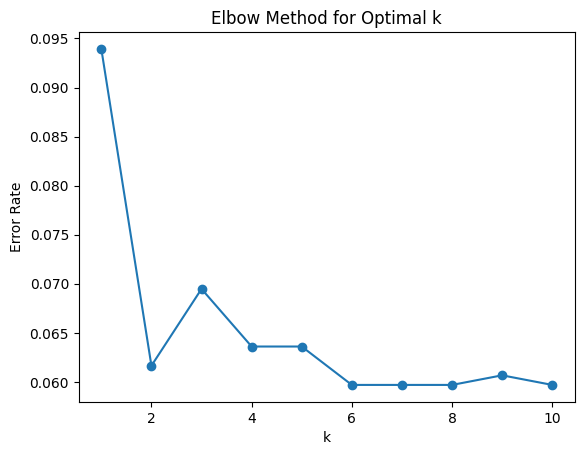

Optimal k: 6
Accuracy: 0.9403


In [104]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

def knn_builtin(df, features_cols, target_col, max_k=5):
    X = df[features_cols]
    y = df[target_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    error_rates = []
    for k in range(1, max_k + 1):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        predictions = knn.predict(X_test)
        error_rates.append(1 - accuracy_score(y_test, predictions))


    plt.plot(range(1, max_k + 1), error_rates, marker='o')
    plt.xlabel('k')
    plt.ylabel('Error Rate')
    plt.title('Elbow Method for Optimal k')
    plt.show()


    optimal_k = np.argmin(error_rates) + 1

    knn = KNeighborsClassifier(n_neighbors=optimal_k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    print(f"Optimal k: {optimal_k}")
    print(f"Accuracy: {accuracy:.4f}")


features_cols = health_data.drop(columns=['stroke']).columns
target_col = 'stroke'
knn_builtin(health_data,features_cols,target_col,10)